In [1]:
from keras.applications.vgg19 import VGG19
model = VGG19(include_top=False, input_shape=(200,200,3))
model.summary()

Using TensorFlow backend.


80142336/80134624 [==============================] - 6s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
______________________________________________________________

In [16]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [0]:
train_data_dir = '/gdrive/My Drive/dataset/train'
validation_data_dir = '/gdrive/My Drive/dataset/val'

In [0]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers import BatchNormalization, Input
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
from keras.callbacks import EarlyStopping

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
 train_data_dir,
 target_size=(200, 200),
 batch_size=32,
 class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
 validation_data_dir,
 target_size=(200, 200),
 batch_size=32,
 class_mode='categorical')


Found 13125 images belonging to 8 classes.
Found 558 images belonging to 8 classes.


In [0]:
for l in range(len(model.layers)):
    model.layers[l].trainable = False

In [10]:
keras_model = Sequential()
keras_model.add(model)
keras_model.add(Flatten())
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dropout(0.3))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dropout(0.2))
keras_model.add(Dense(8, activation='softmax'))

opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

keras_model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
keras_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 6, 6, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                

In [0]:
total_train = 13125
total_val = 558
epochs = 15
batch_size = 500
#esc = EarlyStopping(monitor='val_acc', patience=2)


In [13]:
history = keras_model.fit_generator(
    train_generator,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_val // batch_size,
    #callbacks=[esc]
)

Epoch 1/15
26/26 [==============================] - 712s 27s/step - loss: 2.1333 - accuracy: 0.2945 - val_loss: 1.1795 - val_accuracy: 0.7500
Epoch 2/15
26/26 [==============================] - 664s 26s/step - loss: 1.4039 - accuracy: 0.4399 - val_loss: 1.5231 - val_accuracy: 0.5000
Epoch 3/15
26/26 [==============================] - 667s 26s/step - loss: 1.2924 - accuracy: 0.5048 - val_loss: 1.1056 - val_accuracy: 0.6250
Epoch 4/15
26/26 [==============================] - 647s 25s/step - loss: 1.1718 - accuracy: 0.5529 - val_loss: 1.0386 - val_accuracy: 0.5000
Epoch 5/15
26/26 [==============================] - 648s 25s/step - loss: 1.1121 - accuracy: 0.5637 - val_loss: 1.5451 - val_accuracy: 0.5000
Epoch 6/15
26/26 [==============================] - 615s 24s/step - loss: 1.0720 - accuracy: 0.5863 - val_loss: 1.4515 - val_accuracy: 0.6562
Epoch 7/15
26/26 [==============================] - 639s 25s/step - loss: 1.0523 - accuracy: 0.6070 - val_loss: 1.6037 - val_accuracy: 0.5625
Epoch 

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(15)

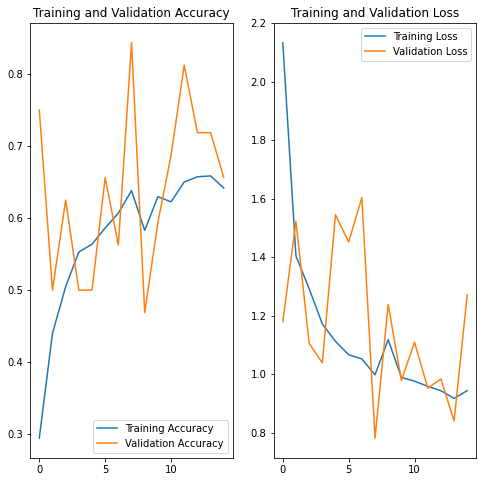

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
save_dir = "/gdrive/My Drive/DiplomWork/Third"
json_file = open(save_dir+"/VGG19ForEmotionDetection.json", "w")
model_json = keras_model.to_json()
json_file.write(model_json)
json_file.close()
keras_model.save_weights(save_dir+"/VGG19ForEmotionDetection_weights.h5")